# Recipe2Cuisine

### The Goal
You've just joined the data team at an online publishing company. One of your verticals is a food publication. A product manager on your team wants to build a feature for this vertical that enables users to query by cuisine, not just by ingredients. Most of your recipes are unlabeled, and it's infeasible to label them by hand. Luckily, you have a small training set of about 10,000 recipes with labeled cuisines.

Design and execute a method to predict the cuisine of a recipe given only its ingredients. How could you design this to be robust enough to understand similarities / substitutions between ingredients? For each each major cuisine, what are the driving ingredients that characterize it?

Your product manager indicates a likelihood that you will only need to write a guideline for an outsourced team to hand label the remaining corpus. How would you go about writing this guide for a few major cuisines?

## Key Findings
This is a difficult classiciation task. Training multiple classification models on one hot coded ingredients doesn't seem to be a good approach. A highly tuned SVM of TF-IDF of ingredients seems to work much better. This task requires a well-tuned model and is likely something that a Deep Learning model could be applied to with much more data present, especially for cuisines with fewer recipes. 

### Driving ingredients by cuisine:
I used the two stacked bar charts below to glean these insights. With more time, I would take insights from the SVC model trained on TF-IDF data at the bottom of this notebook. 

* brazilian: cachaca, lime
* british: milk, butter, heavy cream, baking soda
* cajun_creole: green bell pepper, cayenne, cajun seasoning, celery, black pepper
* chinese: soy sauce, sesame oil, corn starch, green onions/scallions
* filipino: ??
* french: flour, butter, shallots, dry white wine
* greek: feta, oregan, cucumber, lemon juice
* indian: turmeric, garam masala, cumin, chili powder, green chilis, tomatoes
* irish: flour, butter, potatoes
* italian: olive oil, parmesean, garlic, dry white wine
* jamaican: allspice, thyme, black pepper
* japanese: mirin, sake, soy sauce, scallions
* korean: gochujang base, sesame oil, green onions/scallions
* mexican: jalapeno, cumin, onions, chili powder, cilantro, tomatoes
* morroccan: cinnamin, cumin, paprika, coriander, ginger
* russian: ??
* southern_us: flour, butter, large eggs, buttermilk, baking powder
* spanish: red bell pepper, olive oil, sour cream
* thai: vegetable oil, fish sauce, coconut milk, lime, lemongrass, shallots
* vietnamese: fish sauce, lime


In [1]:
# Bring in libraries
import pandas as pd
import numpy as np

# Bring in some plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')


RendererRegistry.enable('notebook')

In [2]:
! ls .. 

README.md     Submissions   recipies.json


In [3]:
df = pd.read_json('../recipies.json')

In [4]:
df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
df.shape

(39774, 3)

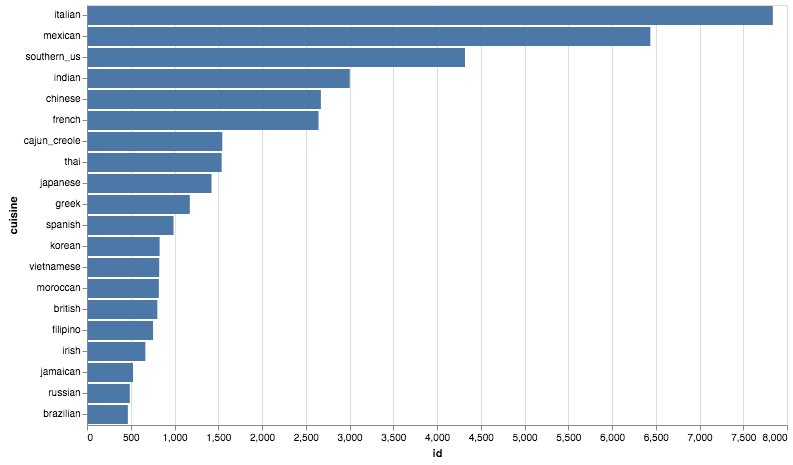

In [6]:
# How many recipes per cuisine?
source = pd.DataFrame(df.groupby('cuisine').count()['id']).reset_index()

alt.Chart(source).mark_bar().encode(
    y=alt.Y('cuisine:N',
            sort=alt.EncodingSortField(
            field="id",  # The field to use for the sort
            op='sum',
            order="descending"  # The order to sort in
            )),
    x="id"
).properties(width=700)

Lots of imbalance here in terms of the number of recipes per cuisine present in the data. 

In [7]:
# Take list of recipes and turn into one hot encoded columns for modeling
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('ingredients')),
                          columns=mlb.classes_,
                          index=df.index))

In [8]:
df.head()

,cuisine,id,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,greek,10259,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,25693,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,filipino,20130,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,22213,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,13162,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
import random

sample_size = 20
[
    df.columns.tolist()[i] for i in sorted(random.sample(range(len(df.columns.tolist())), sample_size))
]

['TACO BELL® Thick & Chunky Mild Salsa',
 'agave nectar',
 'asian wheat noodles',
 'bacon drippings',
 'bartlett pears',
 'bean curd skins',
 'chinese ginger',
 'chopped walnuts',
 'cured pork',
 'low sodium garbanzo beans',
 'mixed peel',
 'nondairy whipped topping',
 'pinot noir',
 'pitted cherries',
 'pork heart',
 'sunflower kernels',
 'swiss',
 'teardrop tomatoes',
 'vegan sour cream',
 'wildflower honey']

In [10]:
# Altair throws an error if the dataset is more than 5000 rows, have to disable this
alt.data_transformers.enable('default', max_rows=None)


DataTransformerRegistry.enable('default')

In [11]:
ingredient_counts = df.groupby(['cuisine']).sum()

In [12]:
ingredient_counts.drop(['id'], axis=1, inplace=True)

In [13]:
ingredient_counts

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
cuisine,,,,,,,,,,,,,,,,,,,,,
brazilian,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,3,0
british,0,0,0,0,0,0,0,0,0,0,...,8,0,0,0,0,0,0,0,3,0
cajun_creole,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,13,0
chinese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,30,0
filipino,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,6,0
french,1,0,0,0,0,0,0,0,1,1,...,41,0,0,0,0,0,5,0,86,0
greek,0,0,0,1,0,0,0,0,0,0,...,4,0,0,0,2,1,2,3,47,0
indian,0,2,0,0,1,0,0,0,0,0,...,27,0,0,0,0,0,0,0,42,0
irish,0,0,0,0,0,0,0,2,0,0,...,24,0,0,0,0,0,0,0,4,0


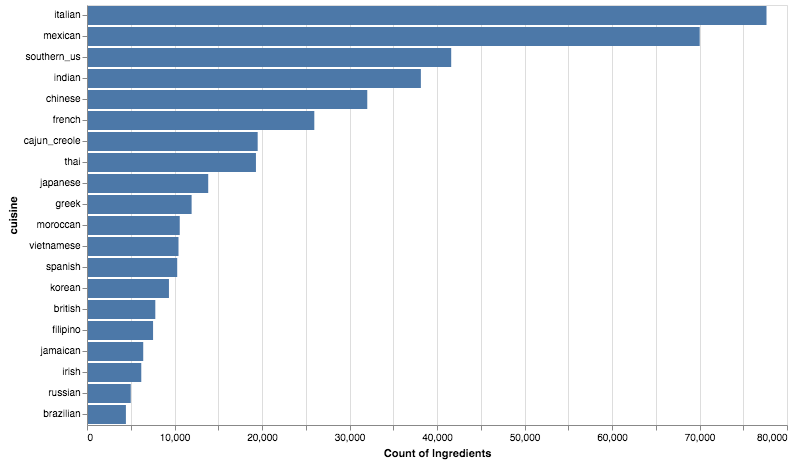

In [14]:
source = pd.DataFrame(ingredient_counts.sum(axis=1,numeric_only=True), columns=['Count of Ingredients']).reset_index()

alt.Chart(source).mark_bar().encode(
    y=alt.Y('cuisine:N',
            sort=alt.EncodingSortField(
            field="Count of Ingredients",  # The field to use for the sort
            op='sum',
            order="descending"  # The order to sort in
            )
        ),
    x=alt.X("Count of Ingredients")
).properties(width=700)

Looks like there are some class imbalances in terms of the number of ingredients used in recipes across the different cuisines. 



In [15]:
melt_ingredients = pd.melt(ingredient_counts.reset_index(), id_vars='cuisine')

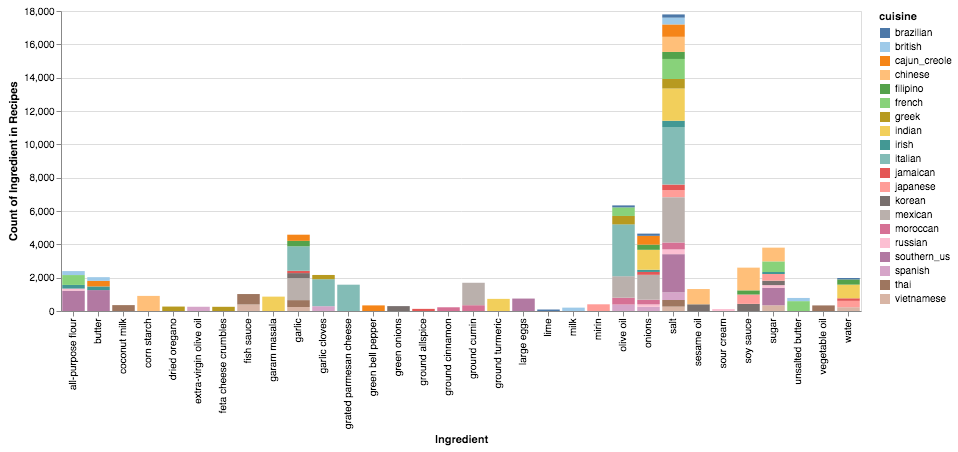

In [16]:
top_5 = melt_ingredients.sort_values(['cuisine','value', 'variable'], 
                             ascending=False).groupby(['cuisine'], sort=False).head(5)

alt.Chart(top_5).mark_bar().encode(
    y=alt.Y('value', axis=alt.Axis(title='Count of Ingredient in Recipes')),
    x=alt.X('variable:O', axis=alt.Axis(title='Ingredient')),
    color=alt.Color('cuisine:N', scale=alt.Scale(scheme='tableau20'))
).properties(width=800)


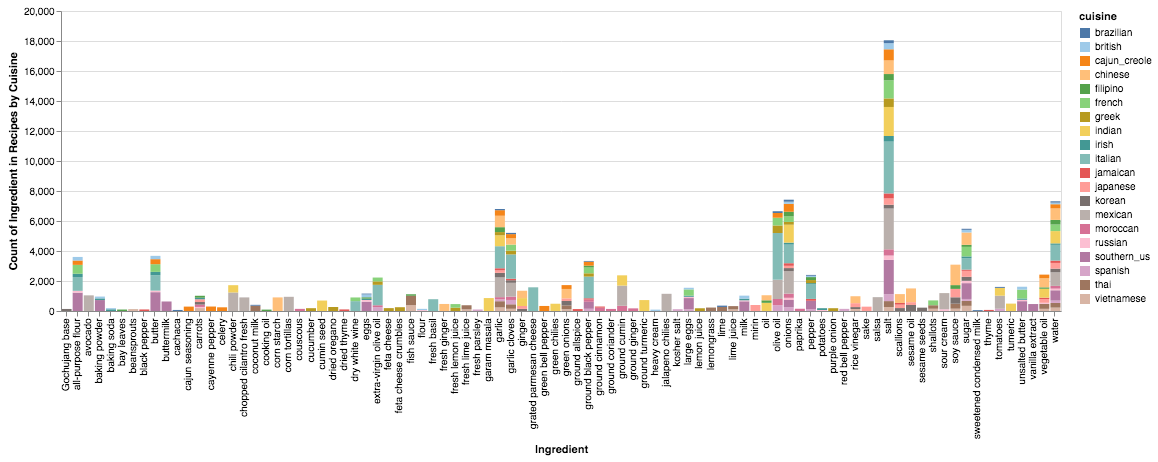

In [17]:
top_15 = melt_ingredients.sort_values(['cuisine','value', 'variable'], 
                             ascending=False).groupby(['cuisine'], sort=False).head(15)

alt.Chart(top_15).mark_bar().encode(
    y=alt.Y('value', axis=alt.Axis(title='Count of Ingredient in Recipes by Cuisine')),
    x=alt.X('variable:O', axis=alt.Axis(title='Ingredient')),
    color=alt.Color('cuisine:N', scale=alt.Scale(scheme='tableau20'))
).properties(width=1000)



## One hot encoded Gradient Boosted Classifier

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

# Test/train split
y = df['cuisine']
X = df.iloc[:,2:]

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
sss.get_n_splits(X, y)

5

In [19]:
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [34231 39548 18256 ...  4912 27631 21104] TEST: [27959 34157 26149 ... 13043  5813  5069]
TRAIN: [35907 19151 39445 ... 25879 18649 25383] TEST: [ 5990 12801  6749 ...  3986 37596  9920]
TRAIN: [ 1323 20916  9764 ... 33486 24796 14018] TEST: [12676  1073  1949 ... 10938  4326 17206]
TRAIN: [ 8736 37062 20126 ... 30583  1831 23788] TEST: [  805 15366 10064 ... 29534  3030 30280]
TRAIN: [17843 25733 13590 ... 23553 33427 22655] TEST: [33112  8987  8889 ... 28629  4992 11429]


In [21]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier



In [23]:
learning_rates = [0.05, 0.5, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb.score(X_test, y_test)))
    print()
    

Learning rate:  0.05
Accuracy score (training): 0.203
Accuracy score (test): 0.202

Learning rate:  0.5
Accuracy score (training): 0.233
Accuracy score (test): 0.232

Learning rate:  1
Accuracy score (training): 0.030
Accuracy score (test): 0.030



In [25]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[   1    0    0    0    0    8    0    1    0  100    0    2    0   10
     0    0   17    0    1    0]
 [   0    6    0    3    0   41    0    4    1  114    0    0    0    5
     2    0   64    0    0    1]
 [   0    0    3    3    0   27    0    3    0  309    0    1    1   16
     0    0  100    0    1    0]
 [   0    0    0   71    0    8    0    2    0  659    1    0    8   23
     1    1   15    0    1   12]
 [   0    0    1   12    1    3    0    0    0  183    1    1    0    4
     0    0   19    0    0    1]
 [   0    0    0    1    0  194    0    0    1  412    0    2    0   25
     0    1  156    0    0    2]
 [   0    0    0    1    0   16    2    3    0  282    0    0    0   21
     0    0   26    0    1    0]
 [   0    0    0    1    0   14    0   80    0  693    0    3    0   42
     0    0   66    0    1    1]
 [   0    0    0    0    0   23    0    0    0  104    2    0    0    5
     0    0   66    0    0    0]
 [   0    0    3   16    0  129    3 

/Volumes/OWC_Big_Phatty/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/OWC_Big_Phatty/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

   brazilian       0.33      0.01      0.01       140
     british       0.67      0.02      0.05       241
cajun_creole       0.23      0.01      0.01       464
     chinese       0.45      0.09      0.15       802
    filipino       1.00      0.00      0.01       226
      french       0.26      0.24      0.25       794
       greek       0.25      0.01      0.01       352
      indian       0.65      0.09      0.16       901
       irish       0.00      0.00      0.00       200
     italian       0.21      0.76      0.32      2352
    jamaican       0.00      0.00      0.00       158
    japanese       0.12      0.01      0.01       427
      korean       0.33      0.04      0.08       249
     mexican       0.28      0.09      0.14      1932
    moroccan       0.31      0.02      0.03       246
     russian       0.22      0.01      0.03       147
 southern_us       0.28      0.30      0.29      1296
     spanish       0.00    

/Volumes/OWC_Big_Phatty/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## TF-IDF with OvR Support Vector Classification

#### One-vs-the-rest (OvR) multiclass/multilabel strategy

Also known as one-vs-all, this strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes. In addition to its computational efficiency (only n_classes classifiers are needed), one advantage of this approach is its interpretability. Since each class is represented by one and one classifier only, it is possible to gain knowledge about the class by inspecting its corresponding classifier. This is the most commonly used strategy for multiclass classification and is a fair default choice.

This strategy can also be used for multilabel learning, where a classifier is used to predict multiple labels for instance, by fitting on a 2-d matrix in which cell [i, j] is 1 if sample i has label j and 0 otherwise.

In the multilabel learning literature, OvR is also known as the binary relevance method.

#### C-Support Vector Classification.

The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.

The multiclass support is handled according to a one-vs-one scheme.

Follows this Kaggle kernel: https://www.kaggle.com/shivamb/tf-idf-with-ovr-svm-what-s-cooking


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import json

In [29]:
data = json.load(open('../recipies.json'))

In [31]:
text_data = [" ".join(doc['ingredients']).lower() for doc in data]

In [36]:
text_data[0:5]

['romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles',
 'plain flour ground pepper salt tomatoes ground black pepper thyme eggs green tomatoes yellow corn meal milk vegetable oil',
 'eggs pepper salt mayonaise cooking oil green chilies grilled chicken breasts garlic powder yellow onion soy sauce butter chicken livers',
 'water vegetable oil wheat salt',
 'black pepper shallots cornflour cayenne pepper onions garlic paste milk butter salt lemon juice water chili powder passata oil ground cumin boneless chicken skinless thigh garam masala double cream natural yogurt bay leaf']

In [37]:
target = [doc['cuisine'] for doc in data]

In [39]:
target[0:5]

['greek', 'southern_us', 'filipino', 'indian', 'indian']

In [49]:
text_data = pd.DataFrame(text_data)
target = pd.DataFrame(target)

In [40]:
sss_text = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
sss_text.get_n_splits(text_data, target)

5

In [50]:
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_text, X_test_text = text_data.iloc[train_index], text_data.iloc[test_index]
    y_train_text, y_test_text = target.iloc[train_index], target.iloc[test_index]

TRAIN: [34231 39548 18256 ...  4912 27631 21104] TEST: [27959 34157 26149 ... 13043  5813  5069]
TRAIN: [35907 19151 39445 ... 25879 18649 25383] TEST: [ 5990 12801  6749 ...  3986 37596  9920]
TRAIN: [ 1323 20916  9764 ... 33486 24796 14018] TEST: [12676  1073  1949 ... 10938  4326 17206]
TRAIN: [ 8736 37062 20126 ... 30583  1831 23788] TEST: [  805 15366 10064 ... 29534  3030 30280]
TRAIN: [17843 25733 13590 ... 23553 33427 22655] TEST: [33112  8987  8889 ... 28629  4992 11429]


In [66]:
# Feature Engineering 
tfidf = TfidfVectorizer(binary=True)
def tfidf_features(txt, flag):
    if flag == "train":
    	x = tfidf.fit_transform(txt)
    else:
	    x = tfidf.transform(txt)
    x = x.astype('float16')
    return x 
X = tfidf_features(X_train_text.values.ravel(), flag='train')
X_test = tfidf_features(X_test_text.values.ravel(), flag="test")

In [78]:
# Label Encoding - Target 
lb = LabelEncoder()
y = lb.fit_transform(y_train_text.values.ravel())
y_test = lb.fit_transform(y_test_text.values.ravel())

In [71]:
# Model Training 
classifier = SVC(C=100, # penalty parameter
	 			 kernel='rbf', # kernel type, rbf working fine here
	 			 degree=3, # default value
	 			 gamma=1, # kernel coefficient
	 			 coef0=1, # change to 1 from default value of 0.0
	 			 shrinking=True, # using shrinking heuristics
	 			 tol=0.001, # stopping criterion tolerance 
	      		 probability=False, # no need to enable probability estimates
	      		 cache_size=200, # 200 MB cache size
	      		 class_weight=None, # all classes are treated equally 
	      		 verbose=False, # print the logs 
	      		 max_iter=-1, # no limit, let it run
          		 decision_function_shape=None, # will use one vs rest explicitly 
          		 random_state=None)
model = OneVsRestClassifier(classifier, n_jobs=4)

In [ ]:
## Model Tuning 
# parameters = {"estimator__gamma":[0.01, 0.5, 0.1, 2, 5]}
# grid_search = GridSearchCV(model, param_grid=parameters)
# grid_search.fit(X, y)
# print grid_search.best_score_
# print grid_search.best_params_
####

In [72]:
model.fit(X, y)

OneVsRestClassifier(estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=4)

In [88]:
# Predictions 
y_test = model.predict(X_test)
y_pred = lb.inverse_transform(y_test)

In [89]:
print("Confusion Matrix:")
print(confusion_matrix(y_test_text, y_pred))
print()
print("Classification Report")
print(classification_report(y_test_text, y_pred))

Confusion Matrix:
[[  87    0    1    1    3    4    0    3    0    7    0    1    0   15
     0    1    7    3    6    1]
 [   0  129    2    1    0   30    1    4   15   16    1    0    0    4
     0    3   35    0    0    0]
 [   1    1  360    2    1    7    1    0    2   15    1    1    1   13
     0    0   55    3    0    0]
 [   0    2    4  684    6    5    1    5    2   10    1   23   13    8
     0    1    5    1   19   12]
 [   3    0    1   21  147    6    1    0    5    4    1    5    4    9
     0    0    9    1    3    6]
 [   1   11    5    1    5  532    3    4   11  134    2    2    0    8
     2    8   56    9    0    0]
 [   0    0    0    0    1   12  263    5    1   50    0    0    1    2
     5    1    7    4    0    0]
 [   1    0    0    2    3    5    4  826    0    5    0    2    2   20
    12    1   10    1    7    0]
 [   0   15    1    0    0   18    3    1  116    9    0    1    1    4
     0    3   27    1    0    0]
 [   1    3    6    2    3   85   42 

In [99]:
model.get_params()

{'estimator__C': 100,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 1,
 'estimator__decision_function_shape': None,
 'estimator__degree': 3,
 'estimator__gamma': 1,
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(C=100, cache_size=200, class_weight=None, coef0=1,
   decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'n_jobs': 4}

In [103]:
model.estimators_[0]

SVC(C=100, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)